In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 한국어 단발성 대화 데이터셋

사전 정보 
* SNS 글 및 온라인 댓글에 대한 웹 크롤링을 실시하여 문장을 선정함
* 문장 단위 작업을 수행할 수 있도록 문장 분리 작업을 거침
* 7개 감정(기쁨, 슬픔, 놀람, 분노, 공포, 혐오, 중립) 레이블링 수행
* 총 데이터 개수: 38,594 문장
* 글자 수 분포 : 23.7±13.6자

EDA
* 7개의 감정('공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오')에 대하여 분류한 데이터셋.  
* 전체 38,594에 약 1000개 정도의 데이터 불균형이 존재.  
* 인터넷 채팅을 기반으로 하고 있어 오타가 많음.  
* 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 75 최소 5, 평균 5 의 분포를 보임.

In [2]:
df1 = pd.read_excel('./한국어_단발성_대화_데이터셋.xlsx')[['Sentence','Emotion']]

In [3]:
# 3만 8천개 약 4만
df1.shape

(38594, 2)

In [4]:
# 앞 20을 통해 suffle의 필요성 확인
# 오타가 많음
df1.head(20)

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
5,남자친구가 떠날까봐요,공포
6,이거 했는데 허리가 아플수도 있나요? ;;,공포
7,내가불안해서꾸는걸까..,공포
8,일주일도 안 남았당...ㅠㅠ,공포
9,약은 최대한 안먹으려고 하는데좋은 음시있나요?0,공포


In [5]:
# 7개의 감정
df1.Emotion.unique()

array(['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'], dtype=object)

In [6]:
# 약간의 데이터 불균형 존재
df1.Emotion.value_counts()

행복    6037
놀람    5898
분노    5665
공포    5468
혐오    5429
슬픔    5267
중립    4830
Name: Emotion, dtype: int64

In [7]:
# 각 감정에서 3개의 sample 추출 결과
pd.concat([df1[df1.Emotion == emotion_].sample(3, random_state = 42) for emotion_ in df1.Emotion.unique()])

,Sentence,Emotion
4434,이제 큰일났구나. 아고.,공포
3809,그 날도 만나는 남자가 있는걸 알긴했지만 ?휴 너무복잡하네요,공포
4037,너무 긴장이됩니다.,공포
11213,근데 4231해도 2선에 시소코알리에릭센 나올 것 같은데,놀람
7446,저렇게 바로 차단이면 가망없죠?,놀람
7228,역시 천조국...,놀람
11712,팔다리에 포승줄로 꽉꽉 소에다가 매달고 달리게 해서 팔다리를 찢어야한다,분노
15064,청와대 에어컨도 없애고 여성부도 없애자,분노
11776,국가와 국민을 배신한 대통령 박근혜와 박근혜에 부역한 국가의 반역자들을 확실하게 ...,분노
21870,고양이에 대해 지식도 없이 분양받은 벌인지 두마리 중한마리가 아파요..,슬픔


In [8]:
# 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 75 최소 1, 평균 5 의 분포를 보임.
pd.Series([len(i) for i in df1.Sentence.str.split(' ')]).describe()

count    38594.000000
mean         5.253278
std          3.118669
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         75.000000
dtype: float64

In [10]:
# null 값 확인
df1.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

# 2. 한국어 연속성 대화 데이터셋

사전 정보
* 연속적  10,000개 대화 (단발성 55,627문장)
* 딥러닝 기반의 챗봇 대화생성을 위해서는 일상적인 대화문이 필요하고, 단문/단답형이 아니라 멀티턴/긴 문장으로 다양한 상황에 대해 작성된 대화문이 필요하나, 한국어 기반으로는 이런 공개된 대화 데이터의 수집이 어려움
* 웹 크롤링 등의 방법으로 대화를 수집하고, 적정 길이와 turn 수 및 주제를 가진 대화를 선정하였으며 감정 레이블링 수행
* 챗봇이 말하기 부적절한 용어(지나치게 전문적인 용어, 비속어 등)을 가능한 범위에서 필터링 하였음
* 연속적 10,000개 대화 세트, 단발성으로는 55,627 문장 존재: 1개 대화당 두 사람이 합쳐서 5.6개 정도의 발화를 주고받음
* 모든 대화문은 두 사람의 대화 내용이며 행이 바뀌면 발화자가 바뀜

EDA
* 7개의 감정('공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오')에 대하여 분류한 데이터셋.  
* 라벨에 오류가 있음  
* nan 값 존재  
* 전체 55621 중 중립이 대다수 43786, 분노 98 데이터 불균형 심함  
* 연속성에 의해 앞뒤의 문맥으로 감정이 보인 경우가 존재 ( 단문장 제거가 도움이 될수 있음)
* 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 67 최소 1, 평균 6의 분포를 보임. 문장이 짧아 생기는 문제가 많을 것으로 보임  

In [11]:
df2 = pd.read_excel('./한국어_연속적_대화_데이터셋.xlsx')[['Unnamed: 0','Unnamed: 1','Unnamed: 2']]
df2.columns = df2.iloc[0]
df2 = df2.drop([0])
df2['dialog #'] = df2['dialog #'].fillna(0)
df2 = df2.dropna()

In [12]:
# nan row 삭제시 5만 5천
df2.shape

(55621, 3)

In [13]:
# 대화의 시작을 S 를 이용하여 표현
df2.head(10)

,dialog #,발화,감정
1,S,아 진짜! 사무실에서 피지 말라니깐! 간접흡연이 얼마나 안좋은데!,분노
2,0,그럼 직접흡연하는 난 얼마나 안좋겠니? 안그래? 보면 꼭... 지 생각만 하고.,혐오
3,0,손님 왔어요.,중립
4,0,손님? 누구?,중립
5,0,몰라요. 팀장님 친구래요.,중립
6,0,내 친구? 친구 누구?,중립
7,0,그걸 내가 어떻게 알아요!,분노
8,S,그래서... 무슨 일 해?,중립
9,0,그냥 방송일 조금.,중립
10,0,방송? 방송 뭐?,중립


In [14]:
# 라벨링에 오타 존재 7개의 emotion classification
df2.감정.unique()

array(['분노', '혐오', '중립', '놀람', '행복', '공포', '슬픔', 'ㅈ중립', '분ㄴ', '중림', 'ㅍ',
       'ㄴ중립', '분', '줄'], dtype=object)

In [15]:
# 데이터 불균형이 크게 보임
df2.감정.value_counts()

중립     43786
놀람      4866
분노      3628
슬픔      1972
행복      1030
혐오       220
공포        98
ㅍ         12
분          4
중림         1
분ㄴ         1
ㄴ중립        1
ㅈ중립        1
줄          1
Name: 감정, dtype: int64

In [16]:
# 각 감정에서 3개의 sample 추출 결과
# 연속성에 의해 앞뒤의 문맥으로 감정이 보인 경우가 존재 
pd.concat([df2[df2.감정 == emotion_].sample(3, random_state = 42) for emotion_ in ['분노', '혐오', '중립', '놀람', '행복', '공포', '슬픔']])

,dialog #,발화,감정
5662,0,구급차는?!,분노
23373,0,"가..가만 안있으면 뭐, 내가 겁먹고 못 때릴까봐?",분노
29452,0,그 미친 놈이... 우리 아들을 저 모양으로 만들었어.. 그런데.. 무슨 벌을 더 ...,분노
1574,0,치,혐오
2750,0,그럼 내가 널 왜 만나러 왔겠어?,혐오
1193,0,잘 줘야 잘 받죠.,혐오
40813,0,꼭 써야 돼요?,중립
53909,S,오히려 혼자 있는 게 더 물어보기 쉬울 걸? 아마도. 걔도 너희들한테는 말하기 힘들...,중립
29202,0,선무당?,중립
23858,0,어머 언니가 어떻게..,놀람


In [17]:
# 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 67 최소 1, 평균 6의 분포를 보임.
pd.Series([len(i) for i in df2.발화.str.split(' ')]).describe()

count    55621.000000
mean         6.571025
std          5.387256
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         67.000000
dtype: float64

In [18]:
# null 값 확인
df2.isnull().sum()

0
dialog #    0
발화          0
감정          0
dtype: int64

# 3. 악플 데이터셋

사전정보
* Korean Haste speech dataset 에서 hate ->0 none ->1 라벨링, offensive는 활용하지 않음 (0:1818 1:3364), 공격적이라고 악성댓글은 아니기 때문.
* 욕설감지데이터셋 에서 욕설문장만 데이터셋으로 활용 (0:2032), 욕이 안들어갔다고 해서 악성댓글이 아닌 건 아니기 때문.
* 본인이 직접 라벨링한 데이터셋 (0:1150 1:1636)
* 라벨링 기준은 욕설이 들어갔거나, 강한 혐오표현, 비난이 들어갔을 경우 0으로 라벨링하였다.

EDA
* 악플 여부를 binary 로 구분한 데이터 셋 ( 악플 0, 나머지 1)  
* 새로운 단어가 많아 이에 대한 문제가 예상  
* 다른 데이터에 비해 두 문장 이상인 경우가 존재함
* 악플을 기준으로 삼아 화자의 감정이 없는 경우, 중복적인 경우 등 애매한 영역이 존재  
* 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 197 최소 1, 평균 9의 분포를 보임.

In [19]:
with open('./악플_데이터셋.csv','r', encoding='UTF8') as f:
    df3 = f.read()

In [20]:
df3 = [i.split('\t') for i in df3.split('\n')]
df3 = pd.DataFrame(df3[1:-1],columns=['content','lable'])

In [21]:
# 만개의 데이터 확인
df3.shape

(10000, 2)

In [22]:
# 새로운 단어가 많아 이에 대한 문제가 예상
df3.head(10)

,content,lable
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...,0
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ,0
2,짱깨 꺼라ㅡ패쓰,0
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...,1
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...,1
5,다음도 들어와라하고...다른 의견내는 유튜버 목 자르고....추아줌마 꺼 여기저기서...,0
6,여자들도 아무한테나 자기야라고하는사람있는데 그것도성희롱인것같은데요,1
7,나경아 젖깐사진이나 인스타에 좀올려라 물좀빼게,0
8,어린시절 가정교육 못 받은 애들은 절대 그 본성을 숨길수없지,0
9,지연이 얼굴은 더 배우같네...,1


In [23]:
# load 중 에러 발생
df3['lable'].unique()

array(['0', '1', '0"', '1"'], dtype=object)

In [24]:
temp = []
for i in df3['lable']:
    if i[-1] =='"':
        temp.append(i[:-1])
    else:
        temp.append(i)
df3['lable'] = temp

In [25]:
# hate ->0 none ->1
df3['lable'].unique()

array(['0', '1'], dtype=object)

In [26]:
# 불균형 없음
df3['lable'].value_counts()

0    5000
1    5000
Name: lable, dtype: int64

In [27]:
# 5개의 sample 추출 결과
# 0은 악플 여부 이에 감정이 들어간 경우도 있지만 없는 경우 또한 존재.
pd.concat([df3[df3.lable == emotion_].sample(10, random_state = 42) for emotion_ in ['0', '1']])

,content,lable
3031,애미고양이 반병신 만들어 놓을테니,0
5178,벌받는 악플러 성별보면 죄다 남자ㅋㅋㅂㅅ들 왜그러고사냐? 한남들 걍 뒤져ㅋㅋㅋ 찌질...,0
5321,대깨문들은 사람이 아니다,0
2120,오늘도 우리회사 노가다 2명 집에감 힘들거같다고개새끼 노가다새끼들이 편한거 할 생각...,0
1410,일베에서 틀딱거리는 새끼들 = 전라도 대깨문 평균나이 50대이상지들이 노인인 줄 모...,0
200,개종자들,0
1180,폭설와서 못가도 걸어서 복귀하라는데 저걸 믿는 새끼들 미필 대깨재앙이지,0
4986,황교안이모지리라도재앙이같이 사악한 인간은아니다아주 끔찍한 인간 문재앙,0
4875,턱 보정물 빼라 제발이다,0
3240,난 그저께 파키스탄에서 접속시도 했다고 경고뜨던데 시발 ㅋㅋㅋ 대체 어디서 내 구글...,0


In [28]:
# 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 197 최소 1, 평균 9의 분포를 보임.
# 앞선 데이터에 비해 두 문장 이상인 경우가 존재함
pd.Series([len(i) for i in df3.content.str.split(' ')]).describe()

count    10000.000000
mean         9.069500
std          8.356091
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        197.000000
dtype: float64

In [29]:
# null 값 확인
df3.isnull().sum()

content    0
lable      0
dtype: int64

# 4. 감정 분류를 위한 대화 음성 데이터셋 4차

사전 정보
* 감성대화 어플리케이션을 이용한 수집
* 일정 기간동안 사용자들이 어플리케이션과 자연스럽게 대화하고, 수집된 데이터를 정제 작업을 거쳐 선별
* 7가지 감정(happiness, angry, disgust, fear, neutral, sadness, surprise)에 대해 5명이 라벨링
* csv 포맷 파일의 메타정보: 대화의 상황, 음성인식 결과, 감정 라벨링 정보, 사용자의 성별 나이 정보

EDA
* 5명의 라벨 데이터를 하나의 결과로 만드는 과정을 진행(가장 많은 투표 받은 라벨)
* 데이터 불균형 존재 슬픔 7042 , 놀람 57
* 오타는 거의 없음
* 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 32 최소 1, 평균 6 의 분포를 보임.

In [30]:
df4 = pd.read_csv('./감정_분류를_위한_대화_음성_데이터셋_4차.csv',encoding='cp949')

In [31]:
df4.shape

(14606, 15)

In [32]:
# 5명의 감정 분류를 하나로 통합하는 과정이 필요
df4.head(10)

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,Sadness,1,32,male
5,5e27fa1c5807b852d9e01586,그냥 걷고 있어.,sad,Neutral,0,Neutral,0,Neutral,0,Sadness,2,Neutral,0,32,male
6,5e27fb575807b852d9e01595,어. 고등학교 동창인데 이렇게 더럽게 쓸줄 몰랐어.,anger,Disgust,2,Disgust,1,Angry,1,Disgust,2,Angry,1,32,male
7,5e2840225807b852d9e01618,처음 학원에서 만났다가 서로 좋아해서 사귀게 되었지.,sad,Neutral,0,Neutral,0,Happiness,1,Neutral,0,Neutral,0,28,male
8,5e2840415807b852d9e01619,내가 애정 표현을 잘 못해서 자주 싸우긴 했어.,sad,Neutral,0,Sadness,1,Sadness,1,Sadness,1,Sadness,2,28,male
9,5e28405b5807b852d9e0161a,오늘 헤어졌어.,sad,Sadness,1,Neutral,0,Sadness,1,Sadness,1,Sadness,1,28,male


In [33]:
# 모두 7개의 감정을 사용하고 있음
for i in range(1,6):
    print(set(df4[f'{i}번 감정'].unique()))

{'Disgust', 'Fear', 'Neutral', 'Surprise', 'Angry', 'Happiness', 'Sadness'}
{'Disgust', 'Fear', 'Neutral', 'Surprise', 'Angry', 'Happiness', 'Sadness'}
{'Fear', 'Disgust', 'Neutral', 'Surprise', 'Happiness', 'Angry', 'Sadness'}
{'Fear', 'Disgust', 'Neutral', 'Surprise', 'Angry', 'Happiness', 'Sadness'}
{'Disgust', 'Fear', 'Neutral', 'Surprise', 'Angry', 'Happiness', 'Sadness'}


<AxesSubplot:>

C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\backends\backend_agg.py:24

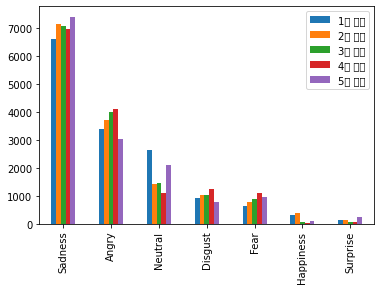

In [34]:
# 큰 비중으로 슬픔이 차지하고 있으며 다음은 분노 중립 순
pd.DataFrame([df4[f'{i}번 감정'].value_counts() for i in range(1,6)]).T.plot.bar()

1. 5명의 label 값을 투표로 생각하여 최대 투표 감정을 선택
2. 감정세기를 가중치로 하여 가장 점수가 높은 감정을 선택  
이중 2번 방안을 이용

In [35]:
emo_loc = {key:val for val,key in enumerate(df4['1번 감정'].unique())}
loc_emo = {val:key for val,key in enumerate(df4['1번 감정'].unique())}

emo_score = np.zeros((len(df4),7))
emo = df4['1번 감정	1번 감정세기	2번 감정	2번 감정세기	3번 감정	3번 감정세기	4번 감정	4번감정세기	5번 감정	5번 감정세기'.split('	')]
for num,i in emo.iterrows():
    emo_score[num,emo_loc[i[0]]] += i[1]
    emo_score[num,emo_loc[i[2]]] += i[3]
    emo_score[num,emo_loc[i[4]]] += i[5]
    emo_score[num,emo_loc[i[6]]] += i[7]
    emo_score[num,emo_loc[i[8]]] += i[9]

df4_2 = pd.DataFrame(df4['발화문'])
df4_2 ['emotion'] = [loc_emo[i] for i in emo_score.argmax(axis=1)]

In [36]:
df4_2.emotion.unique()

array(['Angry', 'Sadness', 'Disgust', 'Happiness', 'Neutral', 'Surprise',
       'Fear'], dtype=object)

In [37]:
df4_2.head(10)

,발화문,emotion
0,"어, 청소 니가 대신 해 줘!",Angry
1,둘 다 청소 하기 싫어. 귀찮아.,Angry
2,둘 다 하기 싫어서 화내.,Angry
3,그럼 방세는 어떡해.,Sadness
4,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,Sadness
5,그냥 걷고 있어.,Sadness
6,어. 고등학교 동창인데 이렇게 더럽게 쓸줄 몰랐어.,Disgust
7,처음 학원에서 만났다가 서로 좋아해서 사귀게 되었지.,Happiness
8,내가 애정 표현을 잘 못해서 자주 싸우긴 했어.,Sadness
9,오늘 헤어졌어.,Sadness


<AxesSubplot:>

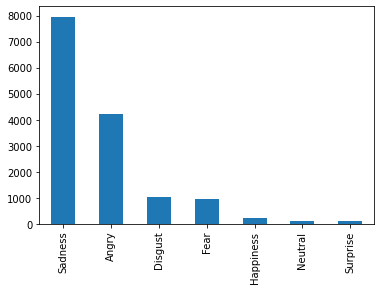

In [38]:
df4_2.emotion.value_counts().plot.bar()

문제점 발견  
중립의 감정세기는 보통 0으로 감정의 세기가 없다.  
슬픔과 분노와 같은 감정의 경우 기본 1 에서 2까지 분포도가 높아 슬픔과 분노가 더 늘어나는 문제 발생  
이에 1번 방안으로 변경

In [39]:
emo_loc = {key:val for val,key in enumerate(df4['1번 감정'].unique())}
loc_emo = {val:key for val,key in enumerate(df4['1번 감정'].unique())}

emo_score = np.zeros((len(df4),7))
emo = df4['1번 감정	1번 감정세기	2번 감정	2번 감정세기	3번 감정	3번 감정세기	4번 감정	4번감정세기	5번 감정	5번 감정세기'.split('	')]
for num,i in emo.iterrows():
    emo_score[num,emo_loc[i[0]]] += 1
    emo_score[num,emo_loc[i[2]]] += 1
    emo_score[num,emo_loc[i[4]]] += 1
    emo_score[num,emo_loc[i[6]]] += 1
    emo_score[num,emo_loc[i[8]]] += 1

df4_1 = pd.DataFrame(df4[['wav_id','발화문']])
df4_1 ['emotion'] = [loc_emo[i] for i in emo_score.argmax(axis=1)]

<AxesSubplot:>

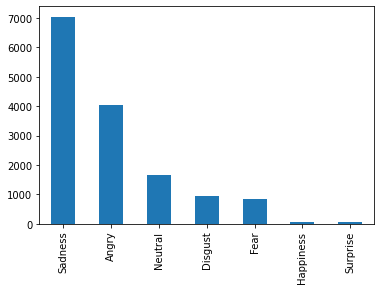

In [40]:
df4_1.emotion.value_counts().plot.bar()

In [41]:
#만 4천여개
df4_1.shape

(14606, 3)

In [42]:
df4_1.head(10)

,wav_id,발화문,emotion
0,5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",Neutral
1,5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,Neutral
2,5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,Angry
3,5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,Sadness
4,5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,Sadness
5,5e27fa1c5807b852d9e01586,그냥 걷고 있어.,Neutral
6,5e27fb575807b852d9e01595,어. 고등학교 동창인데 이렇게 더럽게 쓸줄 몰랐어.,Disgust
7,5e2840225807b852d9e01618,처음 학원에서 만났다가 서로 좋아해서 사귀게 되었지.,Neutral
8,5e2840415807b852d9e01619,내가 애정 표현을 잘 못해서 자주 싸우긴 했어.,Sadness
9,5e28405b5807b852d9e0161a,오늘 헤어졌어.,Sadness


In [43]:
# 데이터 불균형 존재 놀람 행복이 거의 없음
df4_1.emotion.value_counts()

Sadness      7042
Angry        4040
Neutral      1643
Disgust       930
Fear          829
Happiness      65
Surprise       57
Name: emotion, dtype: int64

In [44]:
# 각 감정에서 3개의 sample 추출 결과
pd.concat([df4_1[df4_1.emotion == emotion_].sample(3, random_state = 42) for emotion_ in df4_1.emotion.unique()])

,wav_id,발화문,emotion
2811,5e362fb08661d6073410fb9b,보기 힘든 사람이라서 이번에 봐야될 것 같애.,Neutral
4698,5e36f45933e9ad176cc9ac55,그렇게 할까? 친구랑 연락해볼게.,Neutral
6175,5e37be91dbc4b7182a6a9c73,그래야겠어. 우선 진정 좀 해야지.,Neutral
11833,5e451ba17bef803b4851d60b,"한, 한 시간은 기다린 것 같애.",Angry
562,5e315d5c5807b852d9e0326b,벌써 왔죠! 기대도 안합니다.,Angry
8278,5e3cea2cdbc4b7182a6aa8c6,퇴근한지 얼마나 됐다고 회사에서 연락 또 왔어.,Angry
4030,5e3690e3dbc4b7182a6a9438,"어디가 막 아픈건 아니고, 그냥 꽤 오래 살아서 죽은 거 같애.",Sadness
1122,5e3378a05807b852d9e04c24,집에 와서 그냥 멍하니 앉아있어.,Sadness
434,5e2987fe5807b852d9e019c8,"그런 건 없었는데, 다른 여자 생긴 거 같아.",Sadness
12772,5e48090a2a2d173b73a02c33,화장실에 갔다가 토를 보고 깜짝 놀랐어. 지금도 토를 생각하면 속이 안 좋아.,Disgust


In [45]:
# 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 32 최소 1, 평균 6 의 분포를 보임.
pd.Series([len(i) for i in df4_1['발화문'].str.split(' ')]).describe()

count    14606.000000
mean         6.537177
std          3.567372
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         32.000000
dtype: float64

In [46]:
# null 값 확인
df4.isnull().sum()

wav_id     0
발화문        0
상황         0
1번 감정      0
1번 감정세기    0
2번 감정      0
2번 감정세기    0
3번 감정      0
3번 감정세기    0
4번 감정      0
4번감정세기     0
5번 감정      0
5번 감정세기    0
나이         0
성별         0
dtype: int64

# 5. 감정 분류를 위한 대화 음성 데이터셋 5차

EDA
* 5명의 라벨 데이터를 하나의 결과로 만드는 과정을 진행(가장 많은 투표 받은 라벨)
* 데이터 불균형 존재 슬픔 6112 , 놀람 11
* 오타는 거의 없음
* 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 38 최소 1, 평균 8 의 분포를 보임.

In [50]:
df5 = pd.read_csv('./감정_분류를_위한_대화_음성_데이터셋_5차.csv',encoding='cp949')

In [51]:
# 모두 7개의 감정을 사용하고 있음
for i in range(1,6):
    print(set(df5[f'{i}번 감정'].unique()))

{'Fear', 'Disgust', 'Neutral', 'Surprise', 'Happiness', 'Angry', 'Sadness'}
{'Fear', 'Disgust', 'Neutral', 'Surprise', 'Happiness', 'Angry', 'Sadness'}
{'Fear', 'Disgust', 'Neutral', 'Surprise', 'Angry', 'Happiness', 'Sadness'}
{'Fear', 'Disgust', 'Neutral', 'Surprise', 'Angry', 'Happiness', 'Sadness'}
{'Fear', 'Disgust', 'Neutral', 'Surprise', 'Angry', 'Happiness', 'Sadness'}


<AxesSubplot:>

C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\chat\lib\site-packages\matplotlib\backends\backend_agg.py:24

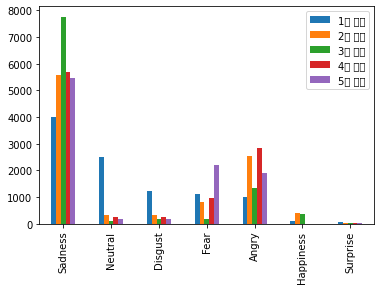

In [52]:
# 의견이 다른 경우가 많은것으로 보임
pd.DataFrame([df5[f'{i}번 감정'].value_counts() for i in range(1,6)]).T.plot.bar()

In [53]:
emo_loc = {key:val for val,key in enumerate(df5['1번 감정'].unique())}
loc_emo = {val:key for val,key in enumerate(df5['1번 감정'].unique())}

emo_score = np.zeros((len(df5),7))
emo = df5['1번 감정	1번 감정세기	2번 감정	2번 감정세기	3번 감정	3번 감정세기	4번 감정	4번감정세기	5번 감정	5번 감정세기'.split('	')]
for num,i in emo.iterrows():
    emo_score[num,emo_loc[i[0]]] += 1
    emo_score[num,emo_loc[i[2]]] += 1
    emo_score[num,emo_loc[i[4]]] += 1
    emo_score[num,emo_loc[i[6]]] += 1
    emo_score[num,emo_loc[i[8]]] += 1

df5_1 = pd.DataFrame(df5['발화문'])
df5_1 ['emotion'] = [loc_emo[i] for i in emo_score.argmax(axis=1)]

In [54]:
df5_1.head(10)

,발화문,emotion
0,개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.,Angry
1,지금도 그대로 있어. 치우는 사람이 없어.,Disgust
2,맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.,Sadness
3,오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.,Sadness
4,그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!,Angry
5,공채로 볼 수 있는 마지막 회사였어. 그래서 정말 많이 노력했거든.,Sadness
6,버려진 개가 워낙 많으니까 시설이 부족할 수 밖에 없고 당연히 상황이 너무 열악하지.,Angry
7,나 면접 또 떨어졌어.,Sadness
8,부모님께서 기대가 너무 크셔서 실망도 크실까봐 아직 말씀 못 드렸어.,Sadness
9,그렇지! 아 나 진짜 너무 싫어 그런 사람들. 대체 생명이 있는 개를 뭐라고 생각하...,Angry


In [55]:
#만 여개
df5_1.shape

(10011, 2)

<AxesSubplot:>

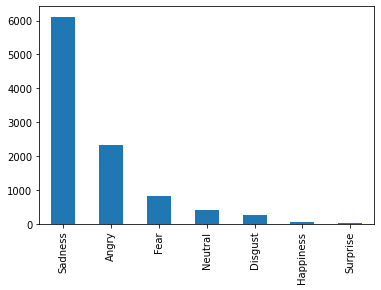

In [56]:
df5_1.emotion.value_counts().plot.bar()

In [57]:
# 데이터 불균형 존재 놀람 행복이 거의 없음
df5_1.emotion.value_counts()

Sadness      6112
Angry        2318
Fear          829
Neutral       414
Disgust       261
Happiness      66
Surprise       11
Name: emotion, dtype: int64

In [58]:
# 각 감정에서 3개의 sample 추출 결과
pd.concat([df5_1[df5_1.emotion == emotion_].sample(3, random_state = 42) for emotion_ in df5_1.emotion.unique()])

,발화문,emotion
4516,5일 이상은 드시는 것 같애. 정말 답답해!,Angry
2522,다른 사람들에 비해 업무량이 너무 많아서 나도 지치고 힘들어서 직장을 옮기고 싶어 ...,Angry
528,진짜 기절하는 줄 알았다니까! 대학교 기숙사도 아니고 무슨 일이야?,Angry
520,화장실을 누가 토 해 놓고 안 치웠어.,Disgust
4896,지금 당장 가서 관리하시는 분한테 화장실 좀 치워달라고 말씀드려야겠어.,Disgust
5658,아침에 일어나서 씻으러 화장실에 갔는데 화장실 바닥이랑 세면대에 토가 있어서 깜짝 ...,Disgust
4546,먹을 게 어딨어? 냉장고를 먹던 반찬 조금?\t,Sadness
449,먹을 거 없어. 반찬도 먹던 거 조금밖에 안남았는데.,Sadness
5707,산책 좋지. 바람이나 쐬러 좀 나갔다 와야겠다.,Sadness
7548,갑자기 일어난 지진 때문에 엄청 놀라고 무서워서 어제 저녁에 잠도 못 잤어. 아직도...,Fear


In [59]:
# 간단히 띄어쓰기를 기준으로 토큰화를 진행 하였을때 최대 38 최소 1, 평균 8 의 분포를 보임.
pd.Series([len(i) for i in df5_1['발화문'].str.split(' ')]).describe()

count    10011.000000
mean         8.515333
std          4.248175
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         38.000000
dtype: float64

In [60]:
# null 값 확인
df5.isnull().sum()

wav_id     0
발화문        0
상황         0
1번 감정      0
1번 감정세기    0
2번 감정      0
2번 감정세기    0
3번 감정      0
3번 감정세기    0
4번 감정      0
4번감정세기     0
5번 감정      0
5번 감정세기    0
나이         0
성별         0
dtype: int64